In [ ]:
!ls

## Imports

In [1]:
# import required librarier
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load data

In [2]:
data = pd.read_csv('data/AdSmartABdata.csv')

## Data Visualization

In [3]:
# Return the first 5 rows
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [4]:
# column names
list(data.columns)

['auction_id',
 'experiment',
 'date',
 'hour',
 'device_make',
 'platform_os',
 'browser',
 'yes',
 'no']

In [5]:
# number of data points
print(f" There are {data.shape[0]} rows and {data.shape[1]} columns")

 There are 8077 rows and 9 columns


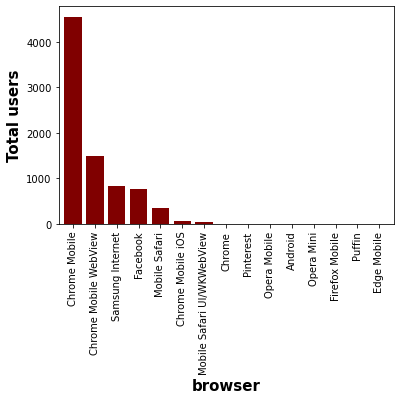

In [6]:
#bar plot for browser
browser_data_count = data['browser'].value_counts()
browser_data_count.plot.bar(color ='maroon', width = 0.8)
plt.xlabel('browser', fontweight ='bold', fontsize = 15)
plt.ylabel('Total users', fontweight ='bold', fontsize = 15)
plt.show()

In [7]:
#Total number of controled and exposed group
controled = len((data[(data['experiment']== "control" )]).index) #total number of controlled groups
exposed = len((data[(data['experiment']== "exposed" )]).index) #total number of exposed groups
print(f'There are {controled} number of controled , and {exposed} number of exposed groups.')

There are 4071 number of controled , and 4006 number of exposed groups.


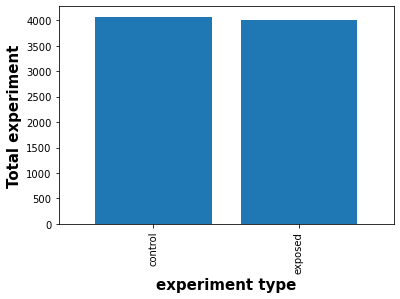

In [8]:
#bar plot number of control and exposed
df = pd.DataFrame({'controled': controled, 'exposed': exposed}, ['0', '1'])
browser = data['experiment'].value_counts()
browser.plot.bar(width = 0.8)
plt.xlabel('experiment type', fontweight ='bold', fontsize = 15)
plt.ylabel('Total experiment', fontweight ='bold', fontsize = 15)
plt.show()

### Merge yes and no columns

In [9]:
yes = pd.DataFrame(data[(data['yes']==1)]) 
no = pd.DataFrame(data[(data['no']==1)])
no['no'] = 0
df_yes_no = pd.concat([yes, no]).sort_index()
df_yes_no. drop(['no'], axis=1, inplace=True)
df_yes_no.rename(columns = {'yes':'converted'}, inplace = True) 
df_yes_no.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,converted
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0
16,008aafdf-deef-4482-8fec-d98e3da054da,exposed,2020-07-04,16,Generic Smartphone,6,Chrome Mobile,1
20,00a1384a-5118-4d1b-925b-6cdada50318d,exposed,2020-07-06,8,Generic Smartphone,6,Chrome Mobile,0
23,00b6fadb-10bd-49e3-a778-290da82f7a8d,control,2020-07-08,4,Samsung SM-A202F,6,Facebook,1
27,00ebf4a8-060f-4b99-93ac-c62724399483,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0


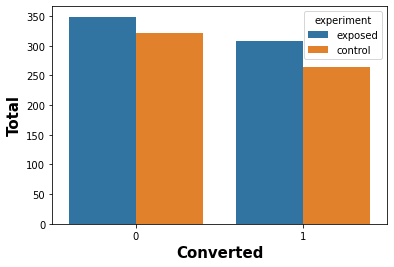

In [10]:
sns.countplot(x="converted", hue="experiment", data=df_yes_no)
plt.xlabel('Converted', fontweight ='bold', fontsize = 15)
plt.ylabel('Total', fontweight ='bold', fontsize = 15)
plt.show()

### Calculate the users who responded yes & no for each group

In [11]:
control_yes = len((df_yes_no[(df_yes_no['converted']==1) & (df_yes_no['experiment']== "control" )]).index)
exposed_yes = len((df_yes_no[(df_yes_no['converted']==1) & (df_yes_no['experiment']== "exposed" )]).index)
control_no = len((df_yes_no[(df_yes_no['converted']==0) & (df_yes_no['experiment']== "control" )]).index)
exposed_no = len((df_yes_no[(df_yes_no['converted']==0) & (df_yes_no['experiment']== "exposed" )]).index)

In [12]:
print(f'number of controled yes: {control_yes}')
print(f'number of controled no: {control_no}')
print(f'number of exposed yes: {exposed_yes}')
print(f'number of exposed no: {exposed_no}')

number of controled yes: 264
number of controled no: 322
number of exposed yes: 308
number of exposed no: 349


## A/B testing